In [3]:
# advance neuro project

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [4]:
def ReLU(x):
    zeros_mat = np.zeros(x.shape)
    output = np.fmax(x,zeros_mat)
    return output

In [5]:
def ReLU_deriv(x):
    non_negs = np.where(x >= 0)
    output = np.zeros(x.shape)
    output[non_negs] = 1
    return output

In [6]:
def angleCal(A, B):
    num = np.trace(np.matmul(np.conjugate(A.T), B))
    norm_A = math.sqrt(np.trace(np.matmul(A,np.conjugate(A.T))))
    norm_B = math.sqrt(np.trace(np.matmul(B,np.conjugate(B.T))))
    denum = norm_A*norm_B
    angle = np.arccos(num/denum)*180/math.pi
    return angle

In [7]:
#### network parameters - open loop 2 layer network - first condition - auto correlated 

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))

# here, the network is open loop and the delta2 is created randomly and kept constant during itertions
backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

# input layer values
input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) # initial value of inputs - constant during iterations
error_delta2 = np.random.normal(mu, sigma, size=(n_b, output_layer_size)) # initial value of error_delta 2 - constant during iterations
error_delta1 = np.matmul(error_delta2, backward_weight_1) # initial value of error_delta1 - constant during iterations since
# delta 2 doesn't change

# updating the network parameters
rep = 10
angles1 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    for j in range (number_of_iterations):
        angles1[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(forward_weight_0.T, input_layer.T).T
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


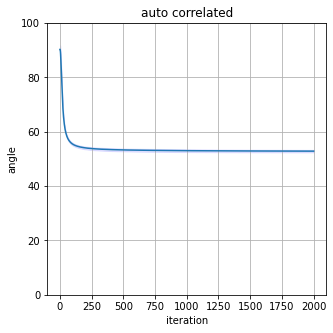

In [8]:
## plot the result of auto correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5));
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles1,0));
ax.set_ylim([0, 100]);
ax.set_title('auto correlated');
ax.set_ylabel('angle');
ax.set_xlabel('iteration');
ax.grid(True);

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles1,0)-np.std(angles1,axis=0), np.mean(angles1,0)+np.std(angles1,axis=0),\
                color='b', alpha=.1);


In [9]:
#### network parameters - open loop 2 layer network - second condition - cross correlated 

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))

# here, the network is open loop and the delta2 is created randomly and kept constant during itertions
backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

# input layer values
input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
error_delta2 = input_layer # cross correlated with inputs of network
error_delta1 = np.matmul(error_delta2, backward_weight_1) 

# updating the network parameters
rep = 10
angles2 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    for j in range (number_of_iterations):
        angles2[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(forward_weight_0.T, input_layer.T).T
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        # generate the parameters again
        input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
        error_delta2 = input_layer
        error_delta1 = np.matmul(error_delta2, backward_weight_1) 
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


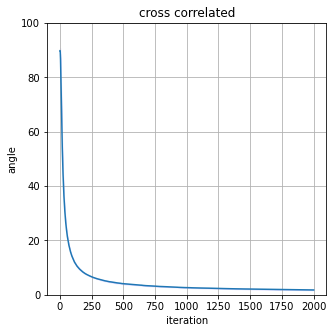

In [10]:
# plot the result of cross correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles2,0))
ax.set_ylim([0, 100])
ax.set_title('cross correlated')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles2,0)-np.std(angles2,axis=0), np.mean(angles2,0)+np.std(angles2,axis=0),\
                color='b', alpha=.1);


In [11]:
#### network parameters - open loop 2 layer network - third condition - not auto correlated nor cross correlated

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))

# here, the network is open loop and the delta2 is created randomly and kept constant during itertions
backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

# input layer values
input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
error_delta2 = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
error_delta1 = np.matmul(error_delta2, backward_weight_1)

# updating the network parameters
rep = 10
angles3 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    for j in range (number_of_iterations):
        angles3[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(forward_weight_0.T, input_layer.T).T
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        # generate the parameters again
        input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
        error_delta2 = np.random.normal(mu, sigma, size=(n_b, output_layer_size)) 
        error_delta1 = np.matmul(error_delta2, backward_weight_1) 
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


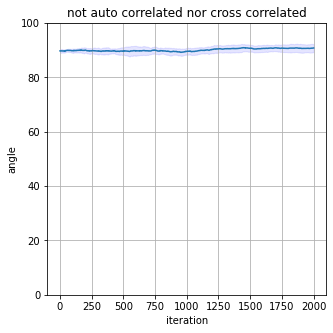

In [12]:
# plot the result of not auto correlated nor cross correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles3,0))
ax.set_ylim([0, 100])
ax.set_title('not auto correlated nor cross correlated')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles3,0)-np.std(angles3,axis=0), np.mean(angles3,0)+np.std(angles3,axis=0),\
                color='b', alpha=.1);


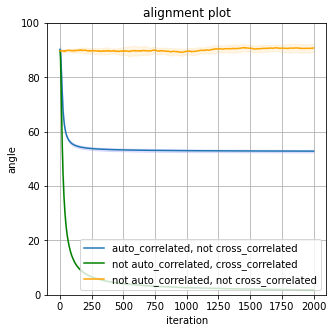

In [13]:
# plot the result of all three conditions together

    
fig, ax = plt.subplots(1,1,figsize=(5,5))

# condition 1
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles1,0))
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence1 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles1,0)-np.std(angles1,axis=0), np.mean(angles1,0)+np.std(angles1,axis=0),\
                color='b', alpha=.1);

# condition 2
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles2,0),color='green')
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence2 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles2,0)-np.std(angles2,axis=0), np.mean(angles2,0)+np.std(angles2,axis=0),\
                color='green', alpha=.1);

# condition 3
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles3,0),color='orange')
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence3 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles3,0)-np.std(angles3,axis=0), np.mean(angles3,0)+np.std(angles3,axis=0),\
                color='orange', alpha=.1);

ax.legend(['auto_correlated, not cross_correlated','not auto_correlated, cross_correlated',\
           'not auto_correlated, not cross_correlated'],loc='lower right')

In [ ]:
# Paper Part - 2.3 Using the provided theoretical tool to investigate FA in the learning process of a practical deep ANN
# train and test a 5 layer network on MNIST
# fact = tanh(ReLU) - 50 neurons in all hidden and output layer - output layer is using 5 hot coding
# images of MNIST should be resized to 15*15 - so we have 225 neurons in input layer 
# inputs should be normalized 
# batch size = 1000, 60 batches available (total numbre of 60K images)
# initialization of forward/ backward weights and biases is done using N(0,0.1)
# loss function is sth like squared error, check page 5 for the details

In [37]:
def n_hot_coder(x,n,hot_labels):
    output_neuron_num = 50
    category_num = 10
    if(category_num*n > output_neuron_num):
        print('nhot encoding can`t be done since the condition`s not met')
        return false
    
    output = np.zeros((len(x),output_neuron_num))
    
    output[np.where(x == 0),:] = categories_5hot[0,:]
    output[np.where(x == 1),:] = categories_5hot[1,:]
    output[np.where(x == 2),:] = categories_5hot[2,:]
    output[np.where(x == 3),:] = categories_5hot[3,:]
    output[np.where(x == 4),:] = categories_5hot[4,:]
    output[np.where(x == 5),:] = categories_5hot[5,:]
    output[np.where(x == 6),:] = categories_5hot[6,:]
    output[np.where(x == 7),:] = categories_5hot[7,:]
    output[np.where(x == 8),:] = categories_5hot[8,:]
    output[np.where(x == 9),:] = categories_5hot[9,:]

    return output

In [52]:
def loss_function(output_layer,labels):
    diffrence = labels-output_layer
    output = 0.5*(np.sum(diffrence**2))
    return output

In [14]:
# Load MNIST Dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('data loaded!')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

data loaded!
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [15]:
# resize images to 15*15

x_train_resized = np.zeros((x_train.shape[0],15,15))
x_test_resized = np.zeros((x_test.shape[0],15,15))

# resize train images
for i in range (x_train.shape[0]):
    image = np.squeeze(x_train[i,:,:])
    x_train_resized[i,:,:] = np.resize(image,(15,15))

    
# resize test images
for i in range (x_test.shape[0]):
    image = np.squeeze(x_test[i,:,:])
    x_test_resized[i,:,:] = np.resize(image,(15,15))
    
print('resizing done!')
print(x_train_resized.shape,x_test_resized.shape)

resizing done!
(60000, 15, 15) (10000, 15, 15)


In [16]:
# vectorize images

x_train_flat = x_train_resized.reshape(x_train_resized.shape[0],-1)
x_test_flat = x_test_resized.reshape(x_test_resized.shape[0],-1)
print('vectorization done!')
print(x_train_flat.shape,x_test_flat.shape)

vectorization done!
(60000, 225) (10000, 225)


In [17]:
# normalize images with train images
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_flat)
x_tr_norm = scaler.transform(x_train_flat)
x_te_norm  = scaler.transform(x_train_flat)

print('normalization done!')

normalization done!


In [38]:
# 5 hot coding the labels
n = 5
category_num = 10
output_neuron_num = 50

# encoding the categroies
categories_5hot = np.zeros((category_num,output_neuron_num))
codes = random.sample(range(output_neuron_num), output_neuron_num)
for i in range(category_num):
    categories_5hot[i,codes[i*n:(i+1)*n]] = 1 
    
y_train_5hot = n_hot_coder(y_train,n,categories_5hot)
y_test_5hot = n_hot_coder(y_test,n,categories_5hot)

    
print('5 hot coding done!')
print(y_train_5hot.shape, y_test_5hot.shape)

5 hot coding done!
(60000, 50) (10000, 50)


In [41]:
# create the network weights and biases from N(0,0.1)
mu = 0
sigma = 0.1

# each layer size
input_layer_size = 225
hidden_layer1_size = 50
hidden_layer2_size = 50
hidden_layer3_size = 50
hidden_layer4_size = 50
output_layer_size = 50

# forward weights
w0 = np.random.normal(mu,sigma,size=(input_layer_size,hidden_layer1_size))
w1 = np.random.normal(mu,sigma,size=(hidden_layer1_size,hidden_layer2_size))
w2 = np.random.normal(mu,sigma,size=(hidden_layer2_size,hidden_layer3_size))
w3 = np.random.normal(mu,sigma,size=(hidden_layer3_size,hidden_layer4_size))
w4 = np.random.normal(mu,sigma,size=(hidden_layer4_size,output_layer_size))

# backward weights
B4 = np.random.normal(mu,sigma,size=(output_layer_size,hidden_layer4_size))
B3 = np.random.normal(mu,sigma,size=(hidden_layer4_size,hidden_layer3_size))
B2 = np.random.normal(mu,sigma,size=(hidden_layer3_size,hidden_layer2_size))
B1 = np.random.normal(mu,sigma,size=(hidden_layer2_size,hidden_layer1_size))

# bias vectors
b1 =  np.random.normal(mu,sigma,hidden_layer1_size)
b2 =  np.random.normal(mu,sigma,hidden_layer2_size)
b3 =  np.random.normal(mu,sigma,hidden_layer3_size)
b4 =  np.random.normal(mu,sigma,hidden_layer4_size)
b5 =  np.random.normal(mu,sigma,output_layer_size)

print('network parameters created!')

network parameters created!


In [53]:
# run the network

batch_size = 1000
batch_num = 60
im_size = 15*15
input_layer = x_tr_norm.reshape((batch_num,batch_size,im_size))

for i in range(batch_num):
    # forward
    z1 = np.matmul(input_layer[i,:,:],w0) + b1
    hidden_layer1 = np.tanh(ReLU(z1))
    z2 = np.matmul(hidden_layer1,w1) + b2
    hidden_layer2 = np.tanh(ReLU(z2))
    z3 = np.matmul(hidden_layer2,w2) + b3
    hidden_layer3 = np.tanh(ReLU(z3))
    z4 = np.matmul(hidden_layer3,w3) + b4
    hidden_layer4 = np.tanh(ReLU(z4))
    z5 = np.matmul(hidden_layer4,w4) + b5
    output_layer = np.tanh(ReLU(z5))
    delta5 = loss_function(output_layer,y_train_5hot[i*batch_size:(i+1)*batch_size,:])
    print(delta5)
    # backward the error

2437.8465405193188
2433.7585653922406
2436.110744626964
2432.367030859811
2439.4114864498683
2441.69855210311
2439.6723791771715
2440.2079183317105
2440.7579733521125
2442.967680515834
2436.8285551630024
2436.4293172493244
2434.69522171533
2439.1322873910713
2437.0434425472345
2440.8573780928205
2437.72840959206
2433.868289804873
2433.273719316276
2439.656970244877
2435.215545806097
2438.1367390304813
2437.39861808147
2434.642720354985
2435.9506890574953
2433.4211929908397
2441.925433826372
2439.8000670297847
2437.9278207534694
2433.2186541834562
2438.8960972045234
2437.8660218189452
2431.299023063475
2438.8300181763593
2434.2302138558075
2435.586009757286
2435.50678552153
2433.936272835339
2438.3908107135
2435.169351764775
2435.985663181662
2441.897061187172
2442.345564315752
2435.4810302305527
2433.1928133801916
2437.7218493044784
2435.4555199727884
2435.1102309675953
2431.0285760541124
2440.1533019763892
2437.2070574938975
2434.444090971228
2443.375613963043
2429.39658042572
2433.48